THIS NOTEBOOK IS FOR PROJECT WORK IN THE COURSE SSY340:

This code uses saved metrics from the notebook "GNNProject.ibynb" to plot and calculate results from the training and testing of different models on the OGB-products benchmark dataset.

Written by: Albin Steen and Anthon Odengard

Date: 20-10-2024

In [1]:
#### IMPORTS #####
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
import pickle
import torch
import torch.nn as nn

In [7]:
def calculate_scores(preds, labels):
    # Flatten lists of predictions and labels
    preds = torch.cat(preds).cpu().numpy()
    labels = torch.cat(labels).cpu().numpy()

    # Calculate the macro, micro, and weighted F1-scores
    acc = accuracy_score(labels, preds)
    f1_macro = f1_score(labels, preds, average='macro')
    f1_micro = f1_score(labels, preds, average='micro')
    f1_weighted = f1_score(labels, preds, average='weighted')


    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score (Macro): {f1_macro:.4f}")
    print(f"F1-score (Micro): {f1_micro:.4f}")
    print(f"F1-score (Weighted): {f1_weighted:.4f}")


def plot_confusion_matrix(preds, labels, class_names, type):
    # Flatten lists of predictions and labels
    preds = torch.cat(preds).cpu().numpy()
    labels = torch.cat(labels).cpu().numpy()

    conf_matrix = confusion_matrix(labels, preds)

    # Normalize the confusion matrix row-wise (i.e., by the number of true instances per class)
    conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(18, 14))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix_normalized, annot=False, cmap='Blues', fmt='.2f',
                xticklabels=class_names, yticklabels=class_names)

    plt.title(f"Normalized Confusion Matrix for {type}", fontsize=22, fontweight='bold')
    plt.xlabel("Predicted Label", fontsize=22, fontweight='bold')
    plt.ylabel("True Label", fontsize=22, fontweight='bold')
    plt.show()

def load_results(names, variables):
    for name, var in zip(names, variables):
        with open(f'{name}.pkl', 'rb') as f:
            var = torch.load(f, map_location=torch.device('cpu'))

In [3]:
def plot_metrics(names, data):
    sns.set_theme(style="whitegrid")

    fig, axs = plt.subplots(1, 2, figsize=(20, 10))

    colors = sns.color_palette("Set2", 3)

    # Define different markers and lighter line styles
    line_styles = ['-', '--', '-.']
    markers = ['o', 's', '^']
    alphas = [0.6, 0.6, 0.6]

    for name, vals, ax in zip(names, data, axs):
        mlp, gcn, sage = vals[0], vals[1], vals[2]
        epochs = np.arange(1, len(mlp) + 1)

        ax.plot(epochs, mlp, line_styles[0], color=colors[0], label='MLP', linewidth=2, markersize=8, marker=markers[0], alpha=alphas[0])
        ax.plot(epochs, gcn, line_styles[1], color=colors[1], label='GCN', linewidth=2, markersize=8, marker=markers[1], alpha=alphas[1])
        ax.plot(epochs, sage, line_styles[2], color=colors[2], label='SAGE', linewidth=2, markersize=8, marker=markers[2], alpha=alphas[2])

        ax.set_xticks(epochs)
        ax.tick_params(axis='both', which='major', labelsize=15)

        ax.set_xlabel("Epochs", fontsize=21, fontweight='bold')
        ax.set_ylabel("Accuracy", fontsize=21, fontweight='bold')
        ax.set_title(f"{name} Accuracy for all Models", fontsize=22, fontweight='bold')

        ax.legend(fontsize=14)

    plt.show()

In [4]:
import pickle

# Function to load the results from CPU pickle files into variables
def load_results_from_cpu(names):
    variables = []
    for name in names:
        with open(f'{name}_cpu.pkl', 'rb') as f:
            data = pickle.load(f)
            variables.append(data)
    return variables

# List of result names (without the '_cpu.pkl' suffix) to load from CPU files
result_names = ['pred_gcn', 'labels_gcn', 'pred_mlp', 'labels_mlp', 
                'pred_sage', 'labels_sage', 'train_acc_gcn', 'val_acc_gcn', 
                'train_acc_mlp', 'val_acc_mlp', 'train_acc_sage', 'val_acc_sage']

# Load the results into variables on the CPU
loaded_results = load_results_from_cpu(result_names)

# Now you can access each result in the 'loaded_results' list, for example:
pred_gcn, labels_gcn, pred_mlp, labels_mlp, pred_sage, labels_sage, \
train_acc_gcn, val_acc_gcn, train_acc_mlp, val_acc_mlp, train_acc_sage, val_acc_sage = loaded_results


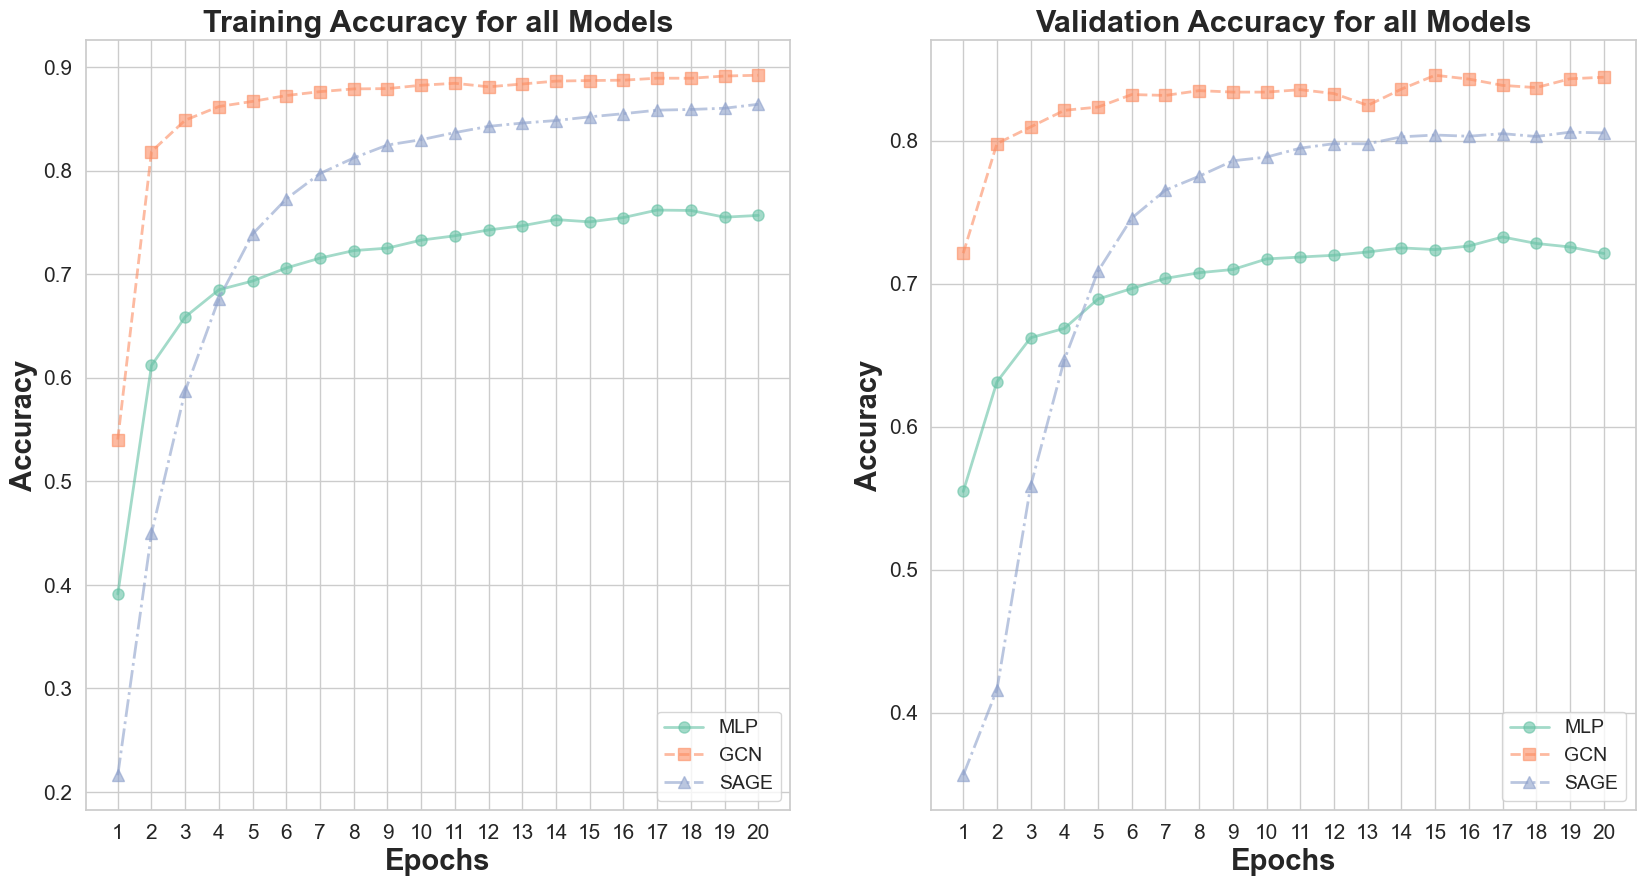

In [5]:
train_acc = [train_acc_mlp, train_acc_gcn, train_acc_sage]
val_acc = [val_acc_mlp, val_acc_gcn, val_acc_sage]

names = ['Training', 'Validation']

plot_metrics(names, [train_acc, val_acc])

Accuracy: 0.5861
F1-score (Macro): 0.2004
F1-score (Micro): 0.5861
F1-score (Weighted): 0.5529


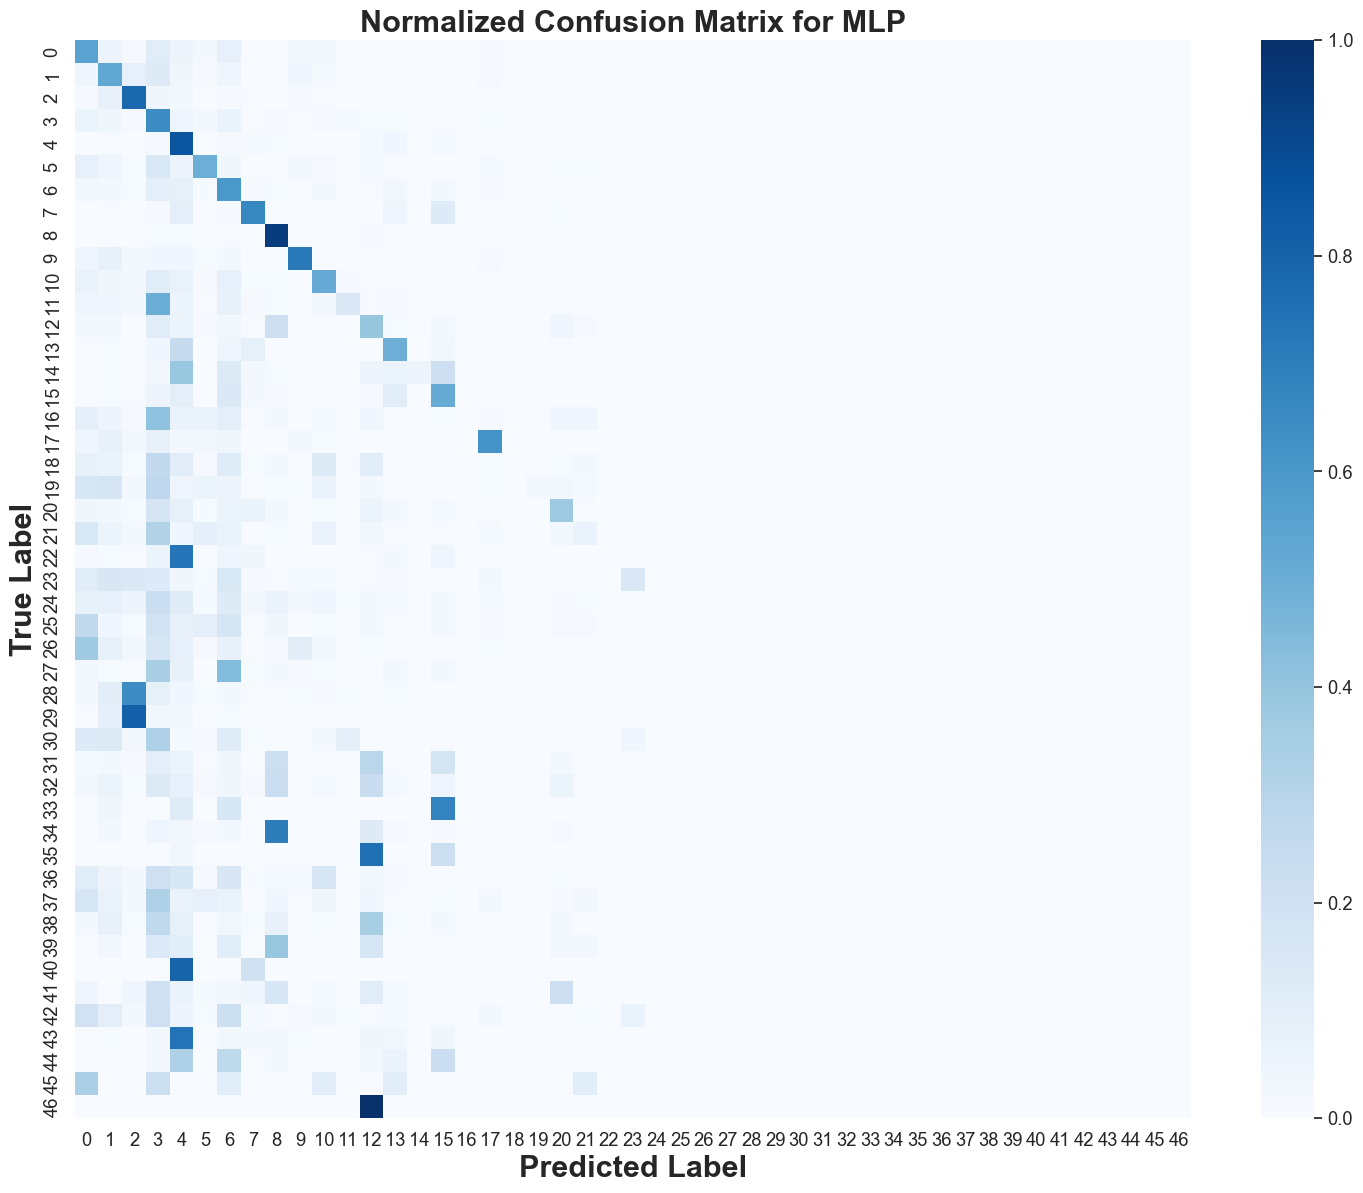

In [8]:
calculate_scores(pred_mlp, labels_mlp)
plot_confusion_matrix(pred_mlp, labels_mlp, np.arange(47), 'MLP')

Accuracy: 0.6598
F1-score (Macro): 0.2538
F1-score (Micro): 0.6598
F1-score (Weighted): 0.6231


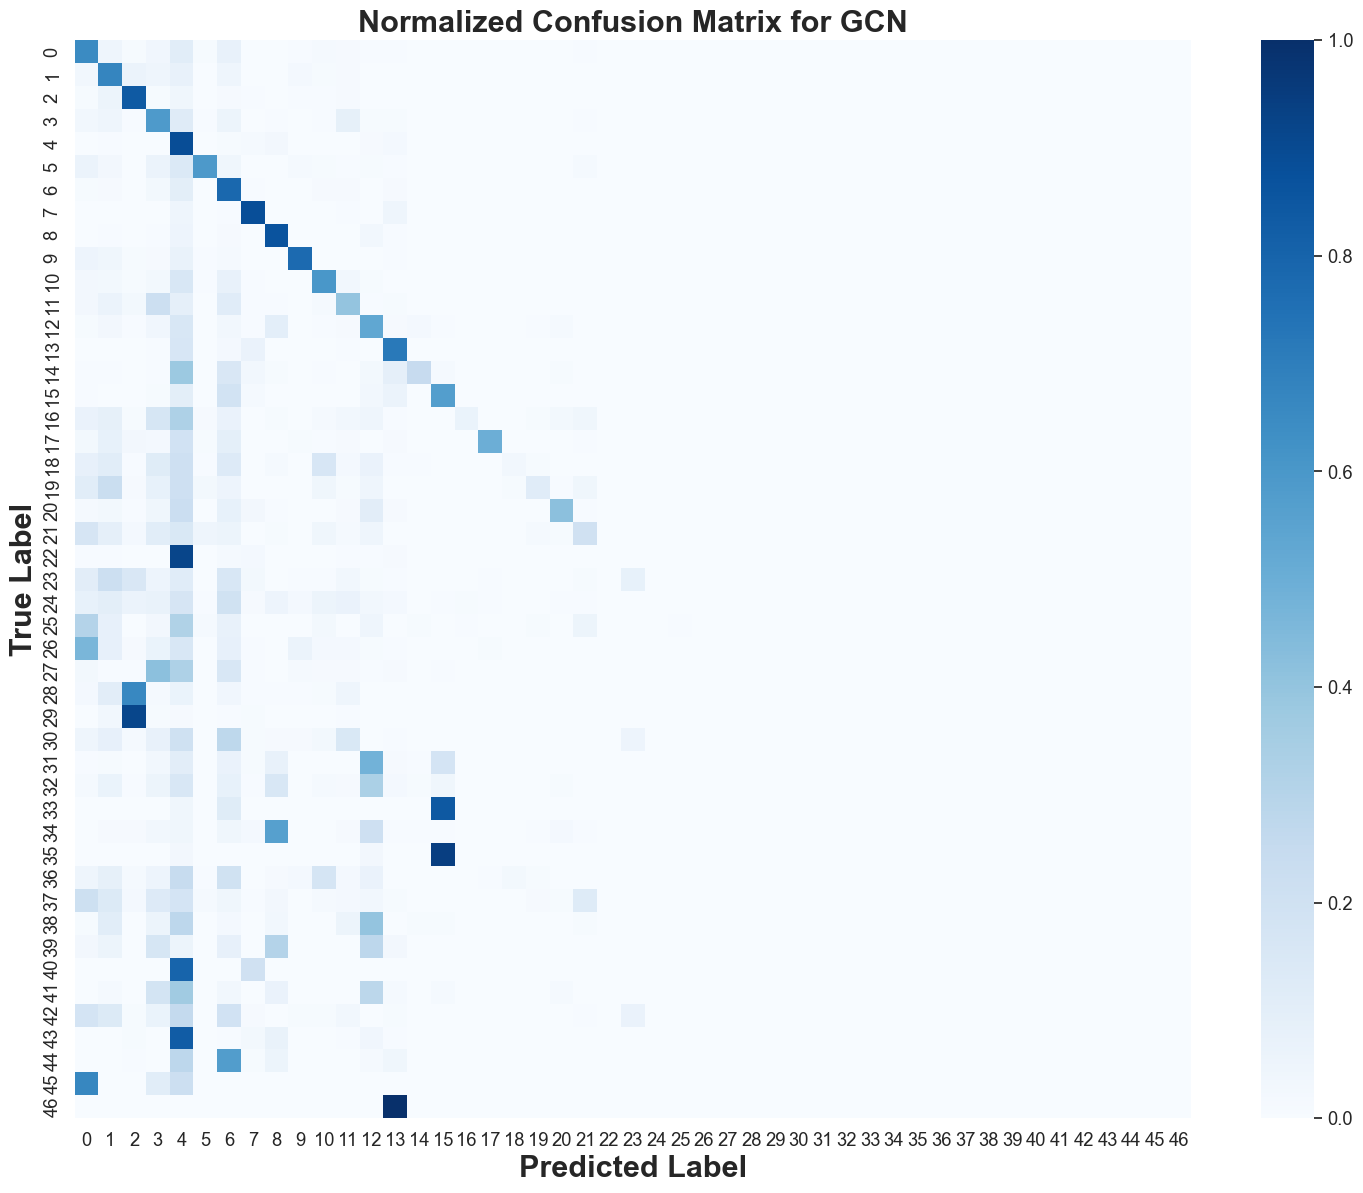

In [10]:
calculate_scores(pred_gcn, labels_gcn)
plot_confusion_matrix(pred_gcn, labels_gcn, np.arange(47), 'GCN')

Accuracy: 0.6350
F1-score (Macro): 0.2243
F1-score (Micro): 0.6350
F1-score (Weighted): 0.5890


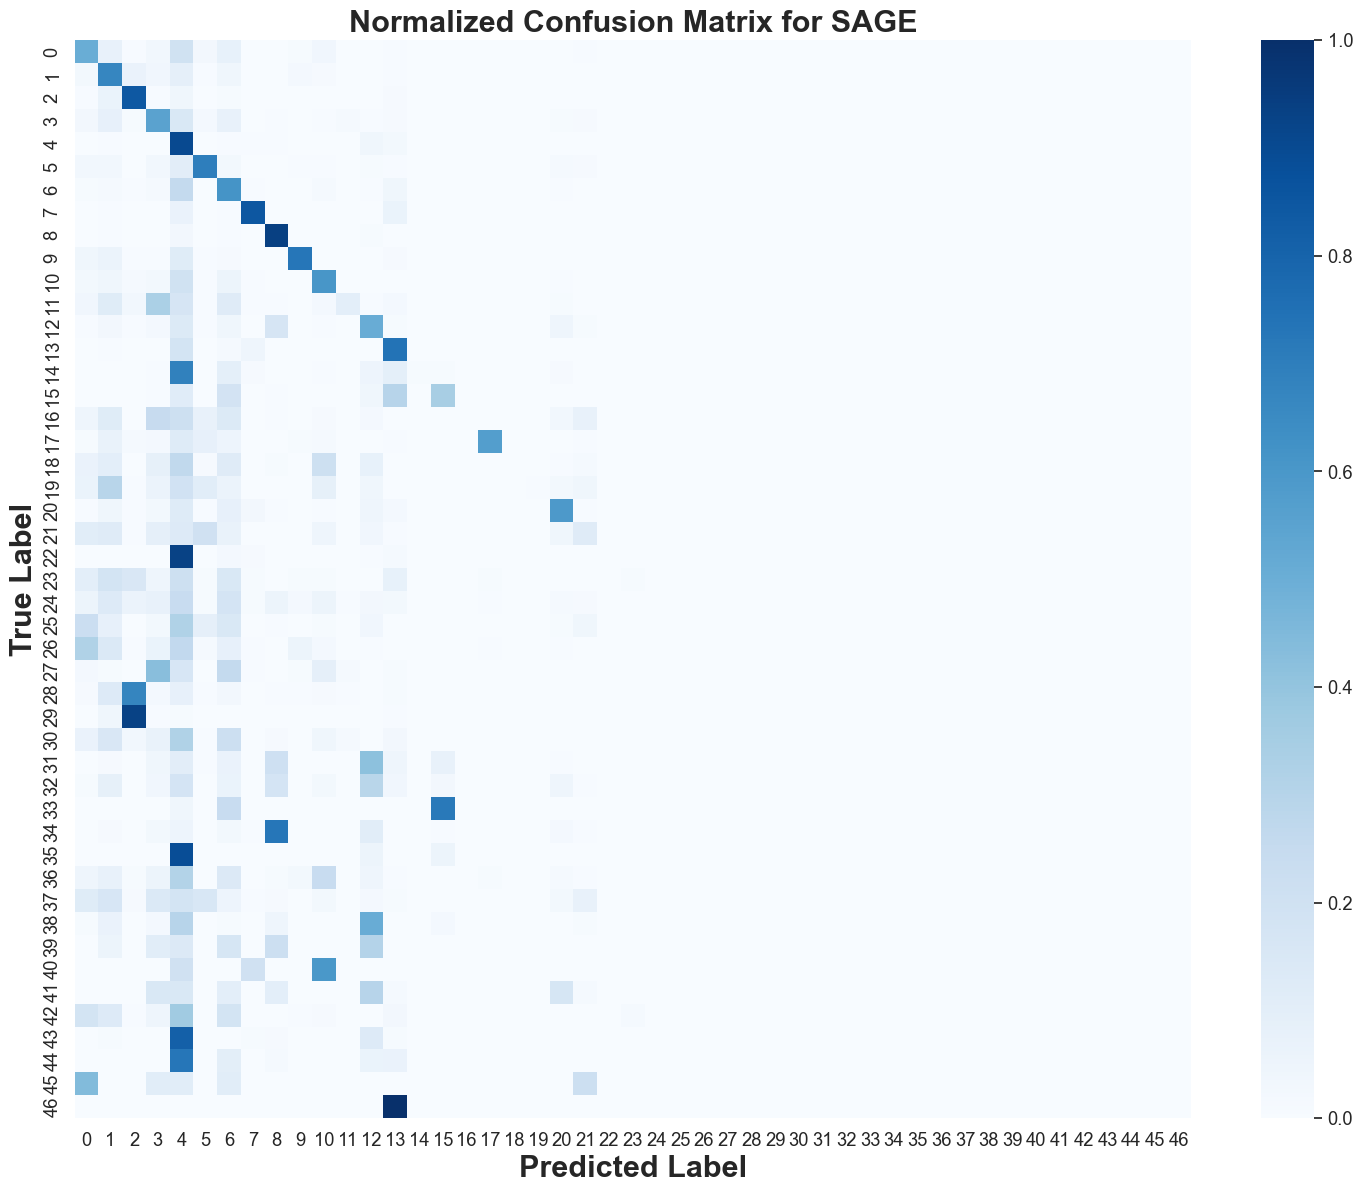

In [11]:
calculate_scores(pred_sage, labels_sage)
plot_confusion_matrix(pred_sage, labels_sage, np.arange(47), 'SAGE')